# ENEL 525 LAB 4- Prediction Using Backpropagation Algorithm

In [288]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import scipy
#from scipy.stats import pearsonr
import pandas as pd
from PIL import Image
from prettytable import PrettyTable
from decimal import Decimal, getcontext



### Function Defs

In [289]:
def mse(array):
    return np.mean(array.flatten()**2)

def logsig(x):
    return 1 / (1 + np.exp(-x))

def purelin(x):
    return x


## PART 1

### True Values 

In [290]:
# Initialize the first value of the sequence
p = [0.35]

# Generate the data sequence of 200 points
for n in range(1, 200):
    p.append(4 * p[n-1] * (1 - p[n-1]))

# Generate the x-axis values
x_values = list(range(1, 201))




### Initialization

In [291]:
Hidden_neurons= 5;
Output_neurons=1;
Inputs_points=2

W1 = np.random.normal(size=( Hidden_neurons,Inputs_points))
W2 = np.random.normal(size=(Output_neurons,Hidden_neurons))
b1= np.random.normal(size=(Hidden_neurons,Output_neurons))
b2= np.random.normal()
et = 0.015
lr = 0.1
f2n2=1;
f1n1 = np.zeros((5, 5))
s2=0;
s1=np.zeros((5, 1))
mse_e = []   # List to store MSE values

### Train using Backpropagation 

In [292]:
while True:
    iteration_errors = []  # Reset the error list at the start of each while loop iteration
    for n in range(2, 190):  # Train from p[2](3rd point) to the 190th point
        #Step 1:Propagate the Input forward (start training to predict p[n] using p[n-1] and p[n-2])
        inputs = np.array([p[n-2], p[n-1]]).reshape((2, 1))
        a1=logsig(np.dot(W1,inputs)+b1)
        a2=purelin(np.dot(W2,a1)+b2)
        err=p[n]-a2
        iteration_errors.append(err) # Store the error from this iteration


        #Step 2: Propagate the sensitivities backward
        s2=(-2)*(f2n2)*(err)
        for i in range(len(a1)):
            #Derivative of f1 (log sigmoid transfer function)= (1-a1)*a1
            f1n1[i, i] = (1 - a1[i]) * a1[i]

        s1=np.dot(f1n1,W2.T)*s2


        #Step 3: Update the weights and biases
        W2=W2-(lr*s2*a1.T)
        b2=b2-(lr*s2)
        W1=W1-(lr*np.dot(s1,inputs.T))
        b1=b1-(lr*s1)
    
    # Calculate and store MSE
    mse_current = mse(np.array(iteration_errors))
    mse_e.append(mse_current)
    # Break if MSE is below the threshold
    if mse_current < et:
        break
    
# Outputs
print("Final W1:", W1)
print("Final b1:", b1)
print("Final W2:", W2)
print("Final b2:", b2)
print("MSE Values:", mse_e)

Final W1: [[ 0.3791743  -0.58449292]
 [-1.07910549 -0.11468982]
 [-1.2382766  -1.7724661 ]
 [ 0.37139958 -3.6593372 ]
 [ 0.08665578  3.846505  ]]
Final b1: [[-1.22668382]
 [-0.45546166]
 [-0.25682838]
 [-0.33505669]
 [-3.60309292]]
Final W2: [[-0.01239389  0.63725957 -1.03864679 -2.80080517 -2.87447143]]
Final b2: [[1.6762477]]
MSE Values: [0.21122883079838356, 0.1808948381892429, 0.17888270746939539, 0.17508674100179356, 0.17128768049583482, 0.16788176933397878, 0.1649021787859745, 0.16231135973330213, 0.16005123029063567, 0.1580544483893299, 0.15625048538940267, 0.15456894894270964, 0.15293996179219255, 0.15129201271282514, 0.14954776883550458, 0.14761800990550114, 0.14539348284785145, 0.1427342459363001, 0.13945612538455626, 0.13531464056701067, 0.12998916048416775, 0.12307610399308785, 0.1141122012724452, 0.10266622528680928, 0.08854440140539446, 0.07210751968886514, 0.05454977687994241, 0.03780943832144774, 0.023875257155842086, 0.013845057605406103]


### MSE Plot Per Iteration

Text(0.5, 1.0, 'Mean Squared Error Over Iterations')

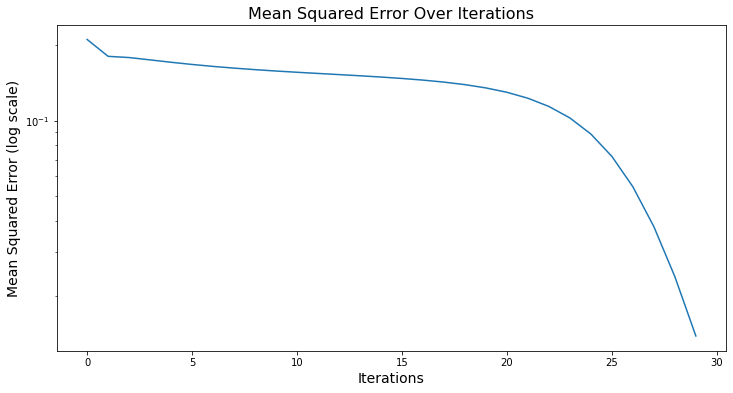

In [293]:
plt.figure(figsize=(12,6)) 
plt.semilogy(mse_e)
plt.xlabel('Iterations', fontsize=14) 
plt.ylabel('Mean Squared Error (log scale)', fontsize=14)
plt.title('Mean Squared Error Over Iterations', fontsize=16)

### Test Neural Network

In [294]:
a2_test = np.zeros(10)
for n in range(190, 200):  # Test from point# 191 to point #200
    inputs = np.array([p[n-2], p[n-1]]).reshape((2, 1))
    a1 = logsig(np.dot(W1, inputs) + b1)
    a2 = purelin(np.dot(W2, a1) + b2)
    a2_test[n-190]=a2
print(a2_test)



[0.76240215 0.33654521 0.82556902 0.10025132 0.2186991  0.66870778
 0.81608187 0.22114069 0.6767365  0.54533237]


### Plot True vs Predicted Values

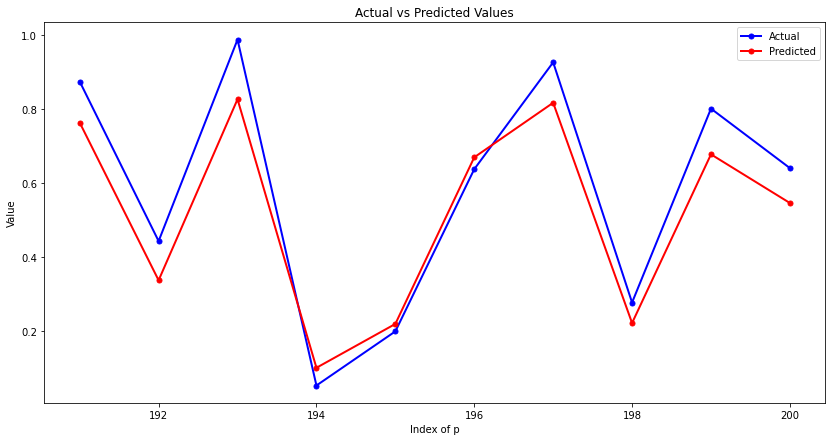

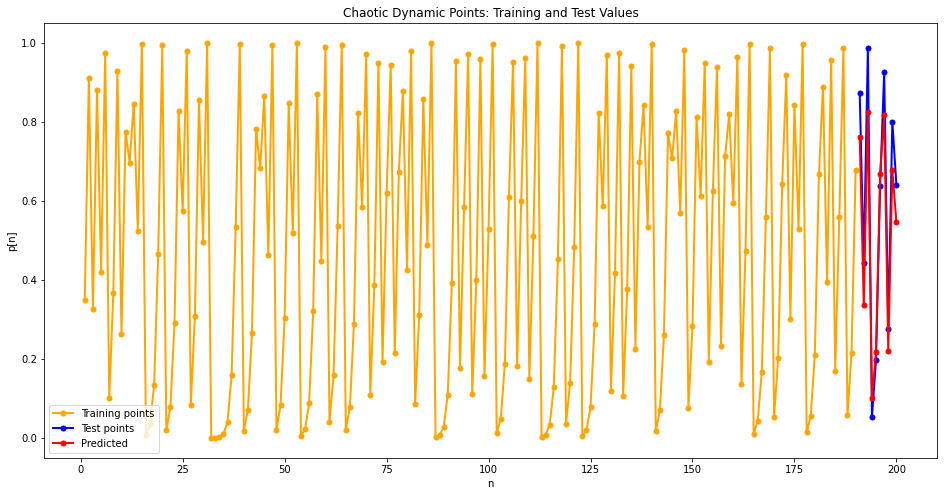

In [295]:
actual_values = p[190:]
predicted_values = a2_test

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(x_values[190:], actual_values, color='blue', linewidth=2, marker='o', markersize=5, label='Actual')
plt.plot(x_values[190:], predicted_values, color='red', linewidth=2, marker='o', markersize=5, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Index of p')
plt.ylabel('Value')
plt.legend()
plt.show()

# Set the figure size to make the plot bigger
plt.figure(figsize=(16, 8))

# Plot the first 190 data points in blue
plt.plot(x_values[:190], p[:190], color='orange', linewidth=2, marker='o', markersize=5, label='Training points')

# Plot the last 10 data points in orange
plt.plot(x_values[190:], p[190:], color='blue', linewidth=2, marker='o', markersize=5, label='Test points')

# Plot the Predicted data points in red
plt.plot(x_values[190:], predicted_values, color='red', linewidth=2, marker='o', markersize=5, label='Predicted')

# Add titles and labels
plt.title('Chaotic Dynamic Points: Training and Test Values')
plt.xlabel('n')
plt.ylabel('p[n]')

# Add the legend
plt.legend()

# Show the plot
plt.show()

## PART 2

### True Values

In [304]:
p=np.load('C:/Users/patsh/Downloads/data1.npy')

# Generate the x-axis values
x_values = list(range(1, 181))

### Initialization

In [305]:
Hidden_neurons= 5;
Output_neurons=1;
Inputs_points=2

W1 = np.random.normal(size=( Hidden_neurons,Inputs_points))
W2 = np.random.normal(size=(Output_neurons,Hidden_neurons))
b1= np.random.normal(size=(Hidden_neurons,Output_neurons))
b2= np.random.normal()
et = 0.00002
lr = 0.05
f2n2=1;
f1n1 = np.zeros((5, 5))
s2=0;
s1=np.zeros((5, 1))
mse_e = []   # List to store MSE values


### Train using Backpropagation

In [306]:
while True:
    iteration_errors = []  # Reset the error list at the start of each while loop iteration
    for n in range(2, 170):  # Train from p[2](3rd point) to the 190th point
        #Step 1:Propagate the Input forward (start training to predict p[n] using p[n-1] and p[n-2])
        inputs = np.array([p[n-2], p[n-1]]).reshape((2, 1))
        a1=logsig(np.dot(W1,inputs)+b1)
        a2=purelin(np.dot(W2,a1)+b2)
        err=p[n]-a2
        iteration_errors.append(err) # Store the error from this iteration


        #Step 2: Propagate the sensitivities backward
        s2=(-2)*(f2n2)*(err)
        for i in range(len(a1)):
            #Derivative of f1 (log sigmoid transfer function)= (1-a1)*a1
            f1n1[i, i] = (1 - a1[i]) * a1[i]

        s1=np.dot(f1n1,W2.T)*s2


        #Step 3: Update the weights and biases
        W2=W2-(lr*s2*a1.T)
        b2=b2-(lr*s2)
        W1=W1-(lr*np.dot(s1,inputs.T))
        b1=b1-(lr*s1)
    
    # Calculate and store MSE
    mse_current = mse(np.array(iteration_errors))
    mse_e.append(mse_current)
    # Break if MSE is below the threshold
    if mse_current < et:
        break
    


### MSE Plot Per Iteration

Text(0.5, 1.0, 'Mean Squared Error Over Iterations')

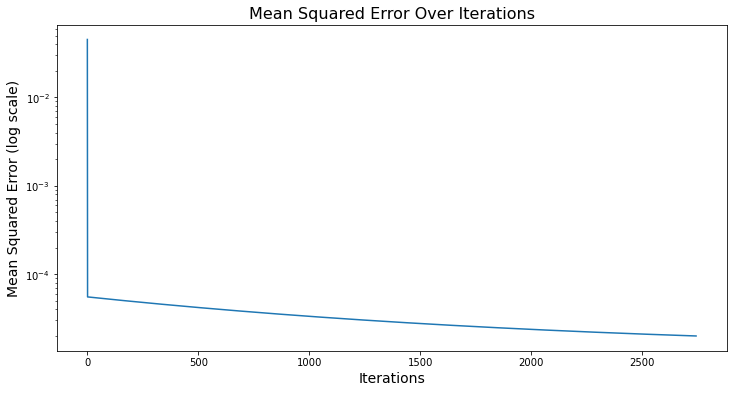

In [307]:
plt.figure(figsize=(12,6)) 
plt.semilogy(mse_e)
plt.xlabel('Iterations', fontsize=14) 
plt.ylabel('Mean Squared Error (log scale)', fontsize=14)
plt.title('Mean Squared Error Over Iterations', fontsize=16)

### Test Neural Network

In [308]:
a2_test = np.zeros(10)
for n in range(170, 180):  
    inputs = np.array([p[n-2], p[n-1]]).reshape((2, 1))
    a1 = logsig(np.dot(W1, inputs) + b1)
    a2 = purelin(np.dot(W2, a1) + b2)
    a2_test[n-170]=a2
print(a2_test)


[-0.0026723  -0.00032325  0.00214941  0.00412909  0.00596078  0.00790131
  0.0097626   0.01095169  0.01072065  0.00906041]


### Plot True vs. Predicted Values

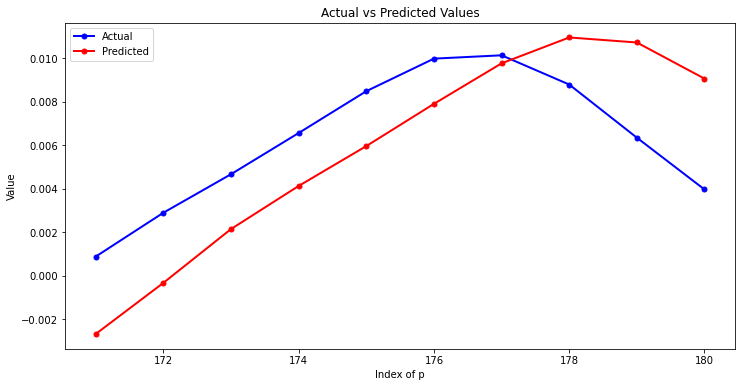

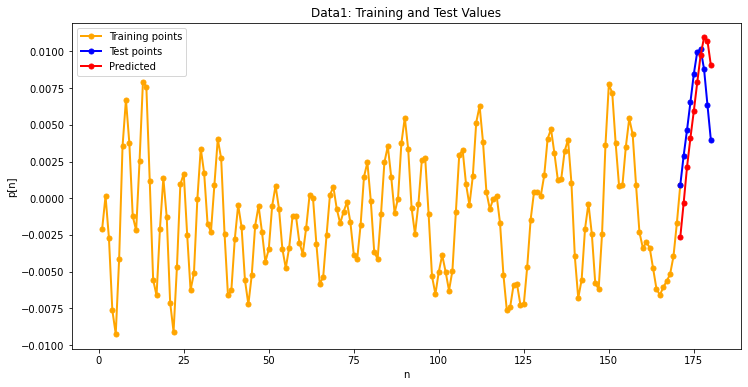

In [309]:
actual_values = p[170:]
predicted_values = a2_test

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(x_values[170:], actual_values, color='blue', linewidth=2, marker='o', markersize=5, label='Actual')
plt.plot(x_values[170:], predicted_values, color='red', linewidth=2, marker='o', markersize=5, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Index of p')
plt.ylabel('Value')
plt.legend()
plt.show()


# Set the figure size to make the plot bigger
plt.figure(figsize=(12, 6))

# Plot the first 190 data points in blue
plt.plot(x_values[:171], p[:171], color='orange', linewidth=2, marker='o', markersize=5, label='Training points')

# Plot the last 10 data points in orange
plt.plot(x_values[170:], p[170:], color='blue', linewidth=2, marker='o', markersize=5, label='Test points')

# Plot the Predicted data points in red
plt.plot(x_values[170:], predicted_values, color='red', linewidth=2, marker='o', markersize=5, label='Predicted')

# Add titles and labels
plt.title('Data1: Training and Test Values')
plt.xlabel('n')
plt.ylabel('p[n]')

# Add the legend
plt.legend()

# Show the plot
plt.show()